# import

In [1]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord


In [2]:
import numpy as np
import pandas as pd




from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

## bandpass transmission curves

In [ ]:
V and R-filter bandpass transmission curves
that I used for the Steward Observatory blazar monitoring program

In [15]:
Fermi_monitor_AGN_V=fits.open('/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/V.fits')

In [16]:
Fermi_monitor_AGN_R=fits.open('/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/R.fits')


In [5]:
Fermi_monitor_AGN_V.info()

Filename: /Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/V.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      86   (61,)   float32   


In [10]:
Fermi_monitor_AGN_V[0].header

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    1  /  NUMBER OF AXES                               
NAXIS1  =                   61  /                                               
OBJECT  = 'AR UMA  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2013-09-09T09:48:51'                                                 
IRAFNAME= '2hv     '            /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           5.812800E4  /  DATA MAX                                     
IRAF-MIN=           4.275000E3  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '            /  PIXEL TYPE                                   
DATE-OBS= '03/04/97' /      

In [7]:
Fermi_monitor_AGN_V[0].data

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.06, 0.37, 0.64,
       0.73, 0.76, 0.75, 0.74, 0.71, 0.66, 0.61, 0.54, 0.47, 0.39, 0.31,
       0.24, 0.18, 0.12, 0.08, 0.05, 0.03, 0.02, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ], dtype=float32)

In [8]:
Fermi_monitor_AGN_R.info()

Filename: /Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/R.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (61,)   float32   


In [9]:
Fermi_monitor_AGN_R[0].data

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01408451,
       0.12676059, 0.50704235, 0.8169015 , 0.9577467 , 0.98591566,
       1.0000001 , 0.97183114, 0.9577467 , 0.92957765, 0.8873241 ,
       0.8591551 , 0.8169015 , 0.7746481 , 0.73239446, 0.67605644,
       0.6338029 , 0.5774649 , 0.50704235, 0.4507043 , 0.39436626,
       0.33802822, 0.2957747 , 0.25352117, 0.21126765, 0.18309861,
       0.15492961, 0.12676059, 0.09859157, 0.08450706, 0.05633804,
       0.04225353, 0.04225353, 0.02816902, 0.02816902, 0.01408451,
       0.01408451], dtype=float32)

In [13]:
Fermi_monitor_AGN_R[0].data.size

61

In [14]:
Fermi_monitor_AGN_V[0].data.size

61

# download

In [15]:
pwd

'/Users/brettlv/blog/brettlv.github.io/pythoncode/changinglookAGN'

## Rphot

import pandas as pd

all_tables = pd.read_html(
    "http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/Rphot_Cycle10.html")

table

all_tables[0]

all_tables[0].iloc[0]

for cycle in np.arange(10):
    num=cycle+1
    all_tables = pd.read_html(
    "http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/Rphot_Cycle%d.html"%(num))
    
    table=all_tables[0]
    table.columns=table.iloc[0]

    if not os.path.exists('Rphot_Cycle%d.xlsx'%num):
        with pd.ExcelWriter('Rphot_Cycle%d.xlsx'%num) as writer:
            table[2:].to_excel(writer,index=False,)
            time.sleep(2+np.random.randint(5,10))

Rphot_Cycle10=pd.read_excel('Rphot_Cycle10.xlsx')

Rphot_Cycle10

# Sources

## root_data_dir

In [10]:
root_data_dir='/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources'

In [3]:
sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

In [11]:
root_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/'
root_obj_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/'#pmn_j0017.html

In [4]:
import requests
r=requests.get(sources_individual_url)
demo=r.text


from bs4 import BeautifulSoup

sources_individual=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            if name_i not in sources_individual:
                sources_individual.append(name_i)
                print(name_i)

pmn_j0017
pks0106
mg1_j021114
3c66a
4c28.07
ao0235
1h0323
cta26
pks0402
pks0420
pks0454
pks0458
pks0502
mg1_j050533
txs0506
pks0507
ver_j0521
pks0528
txs0536
txs0552
b2_0619
b3_0650
s5_0716
4c14.23
pks0735
pks0736
bzu_j0742
sdss_j0844
pks0805
oj248
oj287
pks0906
pmn_j0948
s4_0954
s4_1030
s5_1044
mrk421
pks1118
pks1124
pks1127
ton599
on325
wcom
h1219
pks1222
3c273
s3_1227
mg1_j123931
pks1244
3c279
b3_1343
pks1406
h1426
pks1441
pks1502
pks1510
b2_1520
pg1553
b2_1633
3c345
mrk501
gb6_b1700
nrao530
pks1749
s5_1803
s4_1800
b2_1846
1es1959
pks2023
pks2032
pks2155
txs2159
bllac
cta102
pks2233
b3_2247
pmn_j2250
3c454.3
pmn_j2345
1es2344


In [5]:
len(sources_individual)

80

In [6]:
sources_individual_url

'http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

r=requests.get(sources_individual_url)
demo=r.text

sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            print(name_i)

In [7]:
import requests
from bs4 import BeautifulSoup

r=requests.get(sources_individual_url)
demo=r.text


sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            #name_i=link.get('href')[8:-5]
            Name_i=link.get_text()
            if Name_i not in sources_individual:
                sources_individual_Name.append(Name_i)
                print(Name_i)

PMN J0017-0512
PKS 0106+013
MG1 J021114+1051
3C 66A
4C 28.07
AO 0235+164
1H 0323+342
CTA 26
PKS 0402-362
PKS 0420-014
PKS 0454-234
PKS 0458-02
PKS 0502+049
MG1 J050533+0415
TXS 0506+056
PKS 0507+179
VER J0521+211
PKS 0528+134
TXS 0536+145
TXS 0552+398
B2 0619+33
B3 0650+453
S5 0716+714
4C 14.23
PKS 0735+178
PKS 0736+01
BZU J0742+5444
SDSS J084411+5312
PKS 0805-077
OJ 248
OJ 287
PKS 0906+015
PMN J0948+0022
S4 0954+658
S4 1030+61
S5 1044+71
Mrk 421
PKS 1118-056
PKS 1124-186
PKS 1127-145
Ton 599
ON 325
W Com
H1219+305
PKS 1222+216
3C 273
S3 1227+25
MG1 J123931+0443
PKS 1244-255
3C 279
B3 1343+451
PKS 1406-076
H1426+428
PKS 1441+252
PKS 1502+106
PKS 1510-08
B2 1520+31
PG 1553+113
B2 1633+382
3C 345
Mrk 501
GB6 B1700+6834
NRAO 530
PKS 1749+096
S5 1803+78
S4 1800+44
B2 1846+32A
1ES 1959+650
PKS 2023-07
PKS 2032+107
PKS 2155-304
TXS 2159+505
BL Lac
CTA 102
PKS 2233-148
B3 2247+381
PMN J2250-2806
3C 454.3
PMN J2345-1555
1ES 2344+514


In [8]:
for url_name_,Name_ in zip(sources_individual,sources_individual_Name):
    print(url_name_,Name_)

pmn_j0017 PMN J0017-0512
pks0106 PKS 0106+013
mg1_j021114 MG1 J021114+1051
3c66a 3C 66A
4c28.07 4C 28.07
ao0235 AO 0235+164
1h0323 1H 0323+342
cta26 CTA 26
pks0402 PKS 0402-362
pks0420 PKS 0420-014
pks0454 PKS 0454-234
pks0458 PKS 0458-02
pks0502 PKS 0502+049
mg1_j050533 MG1 J050533+0415
txs0506 TXS 0506+056
pks0507 PKS 0507+179
ver_j0521 VER J0521+211
pks0528 PKS 0528+134
txs0536 TXS 0536+145
txs0552 TXS 0552+398
b2_0619 B2 0619+33
b3_0650 B3 0650+453
s5_0716 S5 0716+714
4c14.23 4C 14.23
pks0735 PKS 0735+178
pks0736 PKS 0736+01
bzu_j0742 BZU J0742+5444
sdss_j0844 SDSS J084411+5312
pks0805 PKS 0805-077
oj248 OJ 248
oj287 OJ 287
pks0906 PKS 0906+015
pmn_j0948 PMN J0948+0022
s4_0954 S4 0954+658
s4_1030 S4 1030+61
s5_1044 S5 1044+71
mrk421 Mrk 421
pks1118 PKS 1118-056
pks1124 PKS 1124-186
pks1127 PKS 1127-145
ton599 Ton 599
on325 ON 325
wcom W Com
h1219 H1219+305
pks1222 PKS 1222+216
3c273 3C 273
s3_1227 S3 1227+25
mg1_j123931 MG1 J123931+0443
pks1244 PKS 1244-255
3c279 3C 279
b3_1343 B3 

In [9]:
len(sources_individual_Name)

80

In [13]:
for i in sources_individual:
    source_dir='%s/%s'%(root_data_dir,i)
    if not os.path.exists(source_dir):
        os.mkdir(source_dir)

In [12]:
url_source='http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273.html'
r=requests.get(url_source)
demo_source=r.text
i='3c273'
soup=BeautifulSoup(demo_source,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        #print(link.get('href'))
        if link.get('href').startswith(i+'_pol'):
            name_i=link.get('href')
            print(name_i)

3c273_pol.html
3c273_pol_2.html
3c273_pol_3.html
3c273_pol_4.html
3c273_pol_5.html
3c273_pol_6.html
3c273_pol_7.html
3c273_pol_8.html
3c273_pol_9.html
3c273_pol_10.html


## Available Polarimetry

In [25]:
for i in sources_individual:
    url_source=root_obj_url+i+'.html'
    print(url_source)
    
    r=requests.get(url_source)
    demo_source=r.text

    soup=BeautifulSoup(demo_source,"html.parser")
    for link in soup.find_all('a'):
        if link.get('href'):
            #print(link.get('href'))
            if link.get('href').startswith(i+'_pol'):
                name_i=link.get('href')
                #print(name_i)  
                
                name_save_i=name_i[:-5]
                save_name_path_i='%s/%s/%s.xlsx'%(root_data_dir,i,name_save_i)
                
               
                if not os.path.exists(save_name_path_i):
                    try:                       
                        all_tables = pd.read_html(root_obj_url+name_i)
                        table=all_tables[0]
                        table.columns=table.iloc[0]
                    
                        print(root_obj_url+name_i)
                        print(save_name_path_i)
                        
                        with pd.ExcelWriter(save_name_path_i) as writer:
                            table[2:].to_excel(writer,index=False,)
                            time.sleep(5+np.random.randint(5,10))
                            
                    except Exception:
                        print(i,'************')                       

http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pmn_j0017.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0106.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/mg1_j021114.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c66a.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/4c28.07.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/ao0235.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/1h0323.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/cta26.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0402.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0420.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0454.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0458.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0502.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/mg1_j050533.html
http://james.as.arizona.edu/~psmith/Fermi/DA

## Available Photometry

In [33]:
#if link.get('href').startswith(i+'_phot'):
for i in sources_individual:
    url_source=root_obj_url+i+'.html'
    print(url_source)
    
    r=requests.get(url_source)
    demo_source=r.text
    time.sleep(1+np.random.randint(1,3))
    
    soup=BeautifulSoup(demo_source,"html.parser")
    for link in soup.find_all('a'):
        if link.get('href'):
            #print(link.get('href'))
            if link.get('href').startswith(i+'_phot'):
                name_i=link.get('href')
                #print(name_i)  
                
                name_save_i=name_i[:-5]
                save_name_path_i='%s/%s/%s.xlsx'%(root_data_dir,i,name_save_i)
                
               
                if not os.path.exists(save_name_path_i):
                    try:                       
                        all_tables = pd.read_html(root_obj_url+name_i)
                        table=all_tables[0]
                        table.columns=table.iloc[0]
                    
                        print(root_obj_url+name_i)
                        print(save_name_path_i)
                        
                        with pd.ExcelWriter(save_name_path_i) as writer:
                            table[2:].to_excel(writer,index=False,)
                            time.sleep(10+np.random.randint(5,10))
                            
                    except Exception:
                        print(i,'************')                                             

http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pmn_j0017.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0106.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/mg1_j021114.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c66a.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/4c28.07.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/ao0235.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/1h0323.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/cta26.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0402.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0420.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0454.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0458.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/pks0502.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/mg1_j050533.html
http://james.as.arizona.edu/~psmith/Fermi/DA

## spec

In [30]:
i='3c273'
url_source=root_obj_url+i+'.html'
print(url_source)

r=requests.get(url_source)
demo_source=r.text

soup=BeautifulSoup(demo_source,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        #print(link.get('href'))
        if link.get('href').startswith(i) and link.get('href').endswith('.tar.gz'):
            name_i=link.get('href')   
            spec_url=root_obj_url+name_i
            save_name_path_i=os.path.join(root_data_dir,i,name_i)
            print(spec_url)
            print(save_name_path_i)
            cmd='wget -c -O %s %s'%(save_name_path_i,spec_url)
            print(cmd)

http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273.html
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273.tar.gz
/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/3c273/3c273.tar.gz
wget -c -O /Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/3c273/3c273.tar.gz http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273.tar.gz
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273_2.tar.gz
/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/3c273/3c273_2.tar.gz
wget -c -O /Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/3c273/3c273_2.tar.gz http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273_2.tar.gz
http://james.as.arizona.edu/~psmith/Fermi/DATA/Objects/3c273_3.tar.gz
/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/3c273/3c273_3.tar.gz


In [28]:
root_data_dir

'/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources'

### tar_spec

# individual 

## pks1510

In [34]:
source_name='pks1510'

In [ ]:
datatypes=['phot','pol']

In [ ]:
def read_data_fermi_monitor(source_name,datatype,data_dir): 
    data_file_dir=os.path.join(data_dir,source_name)
    files=os.listdir(data_file_dir)
    for file in files:
        if file.startswith(source_name+'_'+datatype):
            
        

# Table of Comparison Stars

In [63]:
all_tables = pd.read_html(
    "http://james.as.arizona.edu/~psmith/Fermi/DATA/comp_table.html"
)

table=all_tables[0]
table.columns=table.iloc[0]
save_name='Comparison_Stars_table'

if not os.path.exists('%s.xlsx'%save_name):
    with pd.ExcelWriter('%s.xlsx'%save_name) as writer:
        table[2:].to_excel(writer,index=False,)
        time.sleep(2+np.random.randint(5,10))

In [64]:
Comparison_Stars_table=pd.read_excel('Comparison_Stars_table.xlsx')

In [65]:
Comparison_Stars_table

,Object,Comp Star,V,σ(V),R,σ(R),Reference
0,3C 66A,A,13.65,0.02,13.36,0.01,Smith & Balonek (1998)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AO 0235+164,4,13.04,0.01,12.68,0.03,"Gonzalez-Perez, et al. (2001)"
3,NaN,8,15.03,0.01,14.20,0.01,"Gonzalez-Perez, et al. (2001)"
4,NaN,2,12.72,0.01,12.14,0.01,"Gonzalez-Perez, et al. (2001)"
...,...,...,...,...,...,...,...
78,3C 454.3,3,14.40,0.01,13.95,0.01,"Gonzalez-Perez, et al. (2001)"
79,NaN,4,13.83,0.03,13.23,0.02,Smith & Balonek (1998)
80,NaN,8,13.62,0.03,13.10,0.03,Smith & Balonek (1998)
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
Sources_Comparison_Stars=[]
for i in Comparison_Stars_table['Object']:
    if i not in Sources_Comparison_Stars and isinstance(i,(str)):
        Sources_Comparison_Stars.append(i)

In [81]:
Sources_Comparison_Stars

['3C 66A',
 'AO 0235+164',
 'CTA 26',
 'PKS 0528+134',
 'S5 0716+714',
 'PKS 0735+178',
 'PKS 0736+01',
 'OJ 248',
 'OJ 287',
 'Mrk 421',
 'Ton 599',
 'ON 325',
 'H 1219+305',
 'W Com',
 'PKS 1222+216',
 '3C 273',
 '3C 279',
 'H 1426+428',
 'PKS 1510-08',
 '3C 345',
 'B2 1633+382',
 'Mrk 501',
 '1ES 1959+650',
 'PKS 2155-304',
 'BL Lac',
 'CTA 102',
 '3C 454.3',
 '1ES 2344+514']

In [82]:
len(Sources_Comparison_Stars)

28

# Photometric filter transmission curves

 -------------- Configure PyA's data path ------------------------
  Why do you get this message?
    Most probably PyA tries to save permanent data on your
    system for the first time. This may be the case when, e.g.,
    a table is downloaded and saved. These data are stored
    under PyA's 'data path', i.e., a regular directory on
    your disk, which PyA can access.
  Is anything else saved to the disk?
    The location of the data path
    directory will be written to the file '.pyaConfigWhere' in
    your home directory, so that you need not provide it
    again.
  Can I delete it?
    Yes, you are free to delete anything of this at any time.
  What is a valid data path?
    You may provide any existing or non-existing path, although
    it is strongly encouraged to use a fresh directory to avoid any
    confusion. The given path needs to be absolute, to uniquely
    identify it.
 -----------------------------------------------------------------

Configure PyA's data path now (

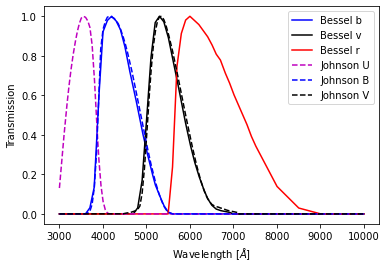

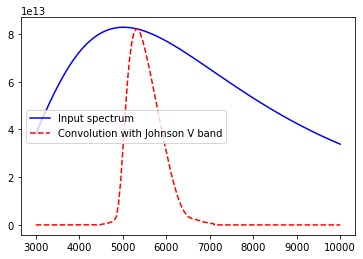

In [57]:
from __future__ import print_function
from PyAstronomy import pyasl
import numpy as np
import matplotlib.pylab as plt
# Import six for Python 2/3 compatibility
import six

# Get transmission curve object
tcs = pyasl.TransmissionCurves()

# Add passbands from Spitzer IRAC
tcs.addSpitzerIRACPassbands()

print("Available bands: ", tcs.availableBands())

# Wavelength axis
wvl = np.linspace(3000, 10000, 10000)

# Plot transmission curves for Bessel b, v, and r bands
for (b, c) in six.iteritems({"b": "b", "v": "k", "r": "r"}):
    tc = tcs.getTransCurve("Bessel " + b)
    trans = tc(wvl)
    plt.plot(wvl, trans, c+'-', label="Bessel " + b)

# Plot transmission curves for Johnson U, B, and V bands
for (b, c) in six.iteritems({"U": "m", "B": "b", "V": "k"}):
    tc = tcs.getTransCurve("Johnson " + b)
    trans = tc(wvl)
    plt.plot(wvl, trans, c+'--', label="Johnson " + b)

plt.legend()
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Transmission")
plt.show()


# Create Planck spectrum ...
wvl = np.arange(3000., 10000., 1.0)
spec = pyasl.planck(T=5777., lam=wvl*1e-10)
# ... and convolve with Johnson V band
vbs = tcs.convolveWith(wvl, spec, "Johnson V")

plt.plot(wvl, spec, 'b-', label='Input spectrum')
plt.plot(wvl, vbs, 'r--', label='Convolution with Johnson V band')
plt.legend()
plt.show()